<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/randomwalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling & Analyzing Random Walk Processes

*Author: Alexander Del Toro Barba*

## What is a Random Walk Process?

A random walk is another time series model where the current observation is equal to the previous observation with a random step up or down. Known as a stochastic or random process.

y(t) = B0 + B1*X(t-1) + e(t)


A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence. The process used to generate the series forces dependence from one-time step to the next. This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides. It is this dependency that gives the process its name as a “random walk” or a “drunkard’s walk”.

https://en.wikipedia.org/wiki/Random_walk
Geometric Brownian motion

**Random Walk and Autocorrelation**

We can calculate the correlation between each observation and the observations at previous time steps. Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.

**Stationarity**

A stationary time series is one where the values are not a function of time. Given the way that the random walk is constructed and the results of reviewing the autocorrelation, we know that the observations in a random walk are dependent on time.

The current observation is a random step from the previous observation. Therefore we can expect a random walk to be non-stationary. In fact, all random walk processes are non-stationary. Note that not all non-stationary time series are random walks.

Additionally, a non-stationary time series does not have a consistent mean and/or variance over time. A review of the random walk line plot might suggest this to be the case. We can confirm this using a statistical significance test, specifically the Augmented Dickey-Fuller test.

**Higher Dimensions**

In higher dimensions, the set of randomly walked points has interesting geometric properties. In fact, one gets a discrete fractal, that is, a set which exhibits stochastic self-similarity on large scales. On small scales, one can observe “jaggedness” resulting from the grid on which the walk is performed. Two books of Lawler referenced below are a good source on this topic. The trajectory of a random walk is the collection of points visited, considered as a set with disregard to when the walk arrived at the point. In one dimension, the trajectory is simply all points between the minimum height and the maximum height the walk achieved (both are, on average, on the order of ?n).

## Prediction

A random walk is unpredictable; it cannot reasonably be predicted. Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. Simply because we know that the next time step will be a function of the prior time step. This is often called the naive forecast, or a persistence model. We can implement this in Python by first splitting the dataset into train and test sets, then using the persistence model to predict the outcome using a rolling forecast method. Once all predictions are collected for the test set, the mean squared error is calculated.

**Is time series a random walk?**

Your time series may be a random walk. Some ways to check if your time series is a random walk are as follows:

* The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
* The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
* The persistence model provides the best source of reliable predictions.

This last point is key for time series forecasting. Baseline forecasts with the persistence model quickly flesh out whether you can do significantly better. If you can’t, you’re probably working with a random walk. Many time series are random walks, particularly those of security prices over time. The random walk hypothesis is a theory that stock market prices are a random walk and cannot be predicted. 

"A random walk is one in which future steps or directions cannot be predicted on the basis of past history. When the term is applied to the stock market, it means that short-run changes in stock prices are unpredictable." - Page 26, A Random Walk down Wall Street: The Time-tested Strategy for Successful Investing.

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

## Applications of Random Walks

* In computer networks, random walks can model the number of transmission packets buffered at a server.
* In population genetics, random walk describes the statistical properties of genetic drift.
* In image segmentation, random walks are used to determine the labels (i.e., “object” or “background”) to associate with each pixel.
* In brain research, random walks and reinforced random walks are used to model cascades of neuron firing in the brain.
* Random walks have also been used to sample massive online graphs such as online social networks.

# Import Libraries

In [0]:
# Import packages
import numpy as np
import sklearn
from decimal import *
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import collections
import datetime
import matplotlib
from scipy import stats
import scipy.stats as stats
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from numpy import sqrt
from copy import copy
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Create Random Walk Process

## 1D Random Walk Time Series

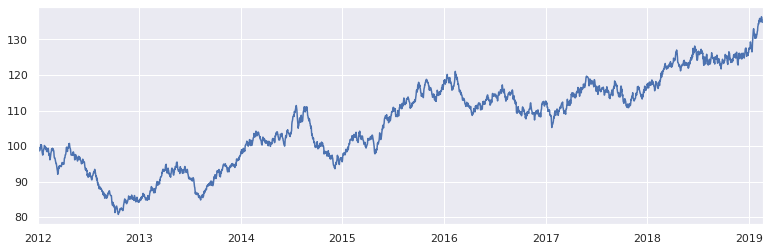

In [14]:
def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2012-01-01', '2019-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
series = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
series.plot()
sns.set(rc={'figure.figsize':(13, 4)})
plt.show()

## 2D Random Walk

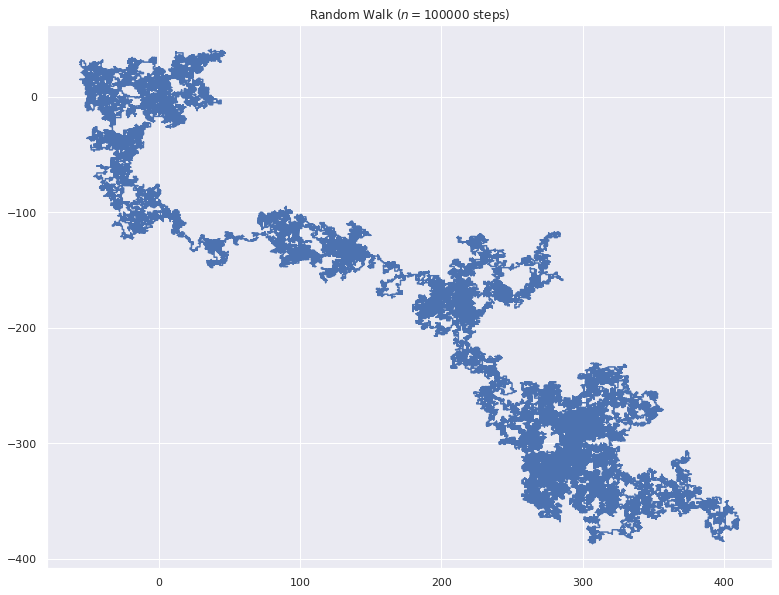

In [15]:
# Python code for 2D random walk. 
import numpy 
import pylab 
import random 
  
# defining the number of steps 
n = 100000
  
#creating two array for containing x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = numpy.zeros(n) 
y = numpy.zeros(n) 
  
# filling the coordinates with random variables 
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
      
  
# plotting stuff: 
sns.set(rc={'figure.figsize':(13, 10)})
pylab.title("Random Walk ($n = " + str(n) + "$ steps)") 
pylab.plot(x, y) 
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600) 
pylab.show() 

# Summarize Time Series

In [16]:
series.head()

2012-01-01    99.226199
2012-01-02    98.988911
2012-01-03    98.850669
2012-01-04    98.567091
2012-01-05    98.844692
Freq: D, dtype: float64

In [17]:
series.describe()

count    2610.000000
mean      106.613961
std        12.382371
min        80.764270
25%        96.631091
50%       109.110403
75%       115.643436
max       136.390255
dtype: float64

In [18]:
series.skew()

-0.0925540916264074

In [19]:
series.kurt()

-0.890330569794795

In [20]:
series.quantile(0.95)

125.43263110187323

# Visualize Time Series

## Time Series Plot

Text(0.5, 0, 'Time step')

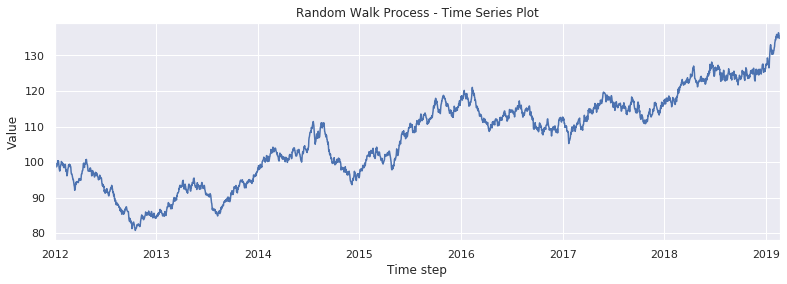

In [21]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.5,title='Random Walk Process - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')
# plt.axhline(y=250, color='yellow', linestyle='--', linewidth=1.0);

## Distribution Plot

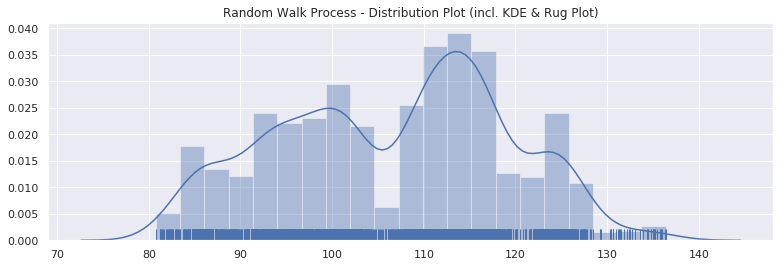

In [22]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Random Walk Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

## Rug Plot

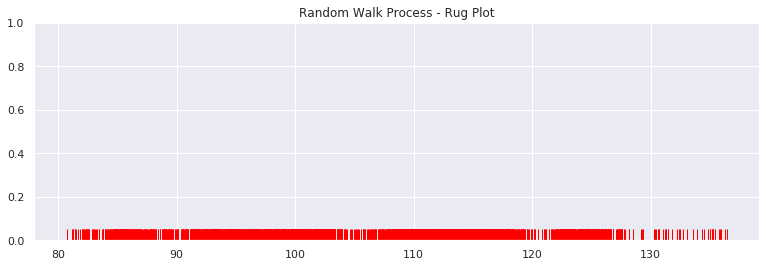

In [23]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
sns.rugplot((df), color ='red').set_title('Random Walk Process - Rug Plot')
plt.show()

## KDE Plot

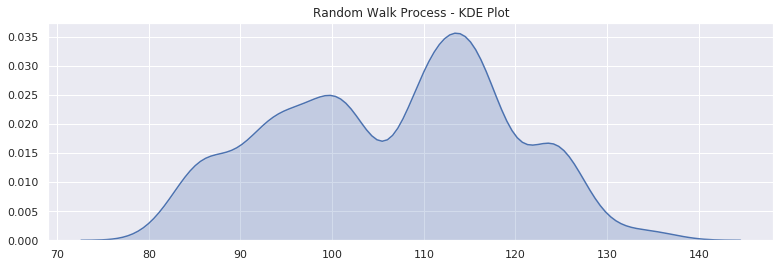

In [24]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
sns.kdeplot(df, shade=True).set_title('Random Walk Process - KDE Plot')
plt.show()

## Autocorrelation Plot

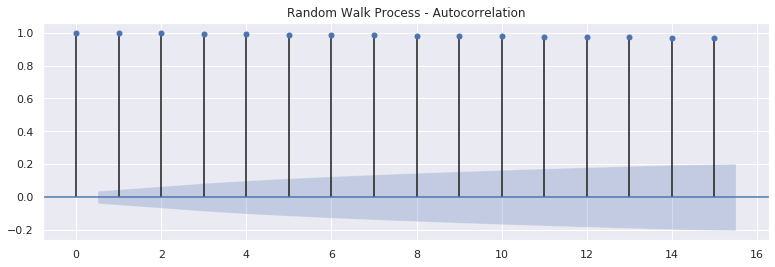

In [25]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(series.squeeze(), lags=15)
plt.title('Random Walk Process - Autocorrelation')
plt.show()

## Partial Autocorrelation Plot

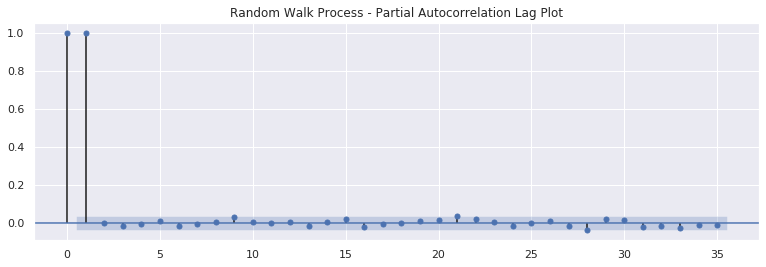

In [26]:
plot_pacf(series)
plt.title('Random Walk Process - Partial Autocorrelation Lag Plot')
plt.show()

## Lag Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


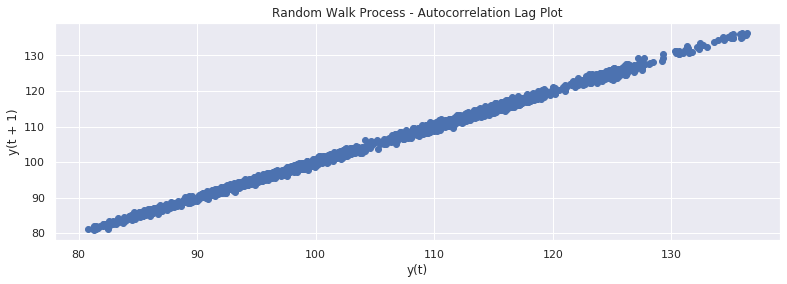

In [27]:
lag_plot(series)
plt.title('Random Walk Process - Autocorrelation Lag Plot')
plt.show()

## Box Plot

Text(0.5, 1.0, 'Random Walk Process - Boxplot')

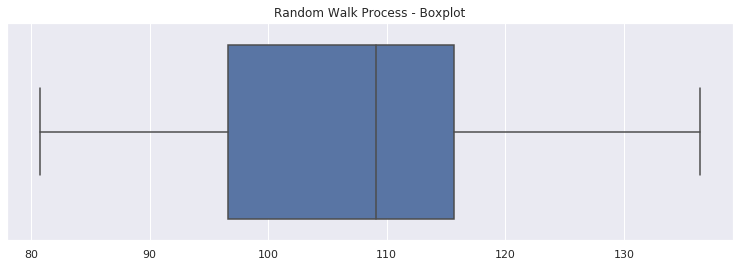

In [28]:
sns.boxplot(series).set_title('Random Walk Process - Boxplot')

## QQ Plot

**Normal Distribution**

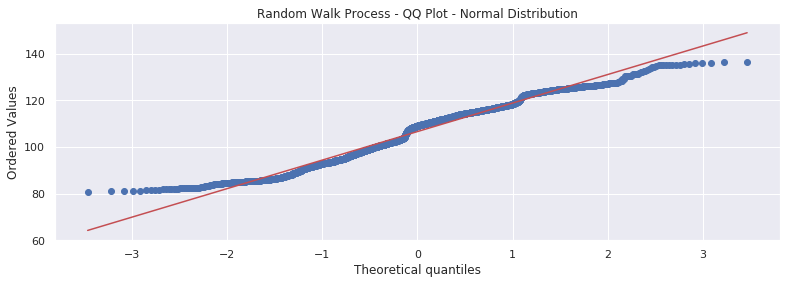

In [29]:
stats.probplot(series, dist="norm", plot=plt)
plt.title('Random Walk Process - QQ Plot - Normal Distribution')
plt.show()

# (Normal) Distribution Tests

## BDS Independence Test

In [30]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(series, max_dim=2, epsilon=None, distance=1.5)

(array(232.09423152), array(0.))

## Kolmogorov-Smirnov Test

In [31]:
# Kolmogorov-Smirnov Test
stats.kstest(series, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

## Jarque-Bera Test

compares sample skewness and kurtosis to 0 and 3, their values under normality.

The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html

Null hypothesis: sample is normal distributed. JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)

In [32]:
stats.jarque_bera(series)

(90.04184069320189, 0.0)

## Anderson-Darling Test

Anderson Darling tests whether the sample from the population follows a particular distribution (default: normal).

In [33]:
stats.anderson(series)

AndersonResult(statistic=22.02404956029386, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# Stationarity & Unit Root Tests

## KPSS Stationary Test

**KPSS Level Stationary Test**

* Kwiatkowski-Phillips-Schmidt-Shin to test if time series is stationarity. Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary. Stationarity Test: KPSS
* H0: Series has no unit root (is stationary or a deterministic trend). Ha: Series is not stationary
* Reject H0 if  p-value of less than 5% and test stats higher than provided critical values

**Cautions**

* A major disadvantage for the KPSS test is that it has a high rate of Type I errors (it tends to reject the null hypothesis too often). If attempts are made to control these errors (by having larger p-values), then that negatively impacts the test’s power.

* One way to deal with the potential for high Type I errors is to combine the KPSS with an ADF test. If the result from both tests suggests that the time series in stationary, then it probably is.

* https://www.statisticshowto.datasciencecentral.com/kpss-test/

**KPSS - Level Stationarity Test**

‘c’ : The data is stationary around a constant (default).

H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [34]:
statsmodels.tsa.stattools.kpss(series, regression='c', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(7.312695879786372,
 0.01,
 30,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Reject H0. Series is non stationary.

**KPSS Trend Stationary Test**

‘ct’ : The data is stationary around a trend.

H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [35]:
statsmodels.tsa.stattools.kpss(series, regression='ct', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.2472130321710083,
 0.01,
 30,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Reject H0. Series is non stationary.

## Augmented Dickey Fuller

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

H0: There is a unit root for the series (non stationary)

Ha: There is no unit root for the series. The series is stationary.

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

**Choose regression {‘c’,’ct’,’ctt’,’nc’} - Constant and trend order to include in regression.**

* ‘c’ : constant only (default).
* ‘ct’ : constant and trend.
* ‘ctt’ : constant, and linear and quadratic trend.
* ‘nc’ : no constant, no trend.

Example: In ADF HO was rejected with trend: no presents of unit root, no trend and no drift. -> test result is that time series contains no unit root and is therefore trend stationary on a 1 % significance level, i.e. is stationary except a deterministic trend. One might want to test if time series is even level stationary: apply an ADF test with level and without trend. If one still can reject the null hypothesis of a unit root, one can conclude stationarity.

In [36]:
# no constant, no trend
statsmodels.tsa.stattools.adfuller(series, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(1.282957435191456,
 0.9489356928035326,
 4,
 2605,
 {'1%': -2.566598807033573,
  '10%': -1.6167184407312587,
  '5%': -1.9411036035107745},
 4388.992204299505)

Test statistic value is 1.7565. This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

Test stats is smaller than provided critical values. p-value is at almost 1. Do not reject H0. Series is not stationary. Difference it ones to make it stationary.

## Zivot-Andrews Structural-break

Unit root tests can be wrong if a structural break occurred in timeseries. Zivot-Andrews test checks for structural Break Unit Root.

H0 = unit root with a single structural break

In [37]:
statsmodels.tsa.stattools.zivot_andrews(series, regression='c', autolag='aic')

AttributeError: ignored

# Portmanteau & Autocorrelation Tests

Portmanteau-Tests sind statistische Tests, mit deren Hilfe für mehrere Autokorrelationskoeffizienten getestet werden kann, ob sie sich signifikant von null unterscheiden. Dies ist vor allem bei der Prüfung der Autokorrelationsfreiheit der Residuen im Rahmen der Diagnosephase einer Zeitreihenanalyse wichtig.
Portmanteau-Tests sind reine Signifikanztests. Sie testen nicht gegen eine klar formulierte Gegenhypothese.
Die Teststatistik wird Q-Statistik genannt.

## Ljung-Box Q Statistic

Ljung–Box test is an improved version of the Box–Pierce test

In [38]:
# Ljung-Box Q Statistic
# Returns Ljung-Box Q-statistic for autocorrelation parameters and p-value
# examining the null hypothesis of independence in a given time series. These are sometimes known as ‘portmanteau’ tests.
statsmodels.tsa.stattools.q_stat(series, nobs=3000, type='ljungbox')

(array([2.95670628e+07, 5.90026979e+07, 8.83659686e+07, ...,
        2.36908003e+11, 2.37328727e+11, 2.37752162e+11]),
 array([0., 0., 0., ..., 0., 0., 0.]))

## Durban-Watson Statistic

Used in autoregressive models
The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. 
A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation. 
A stock price displaying positive autocorrelation would indicate that the price yesterday has a positive correlation on the price today—so if the stock fell yesterday, it is also likely that it falls today. A security that has a negative autocorrelation, on the other hand, has a negative influence on itself over time—so that if it fell yesterday, there is a greater likelihood it will rise today.


In [39]:
# Durbin-Watson test to assess autocorrelation
# The null hypothesis of the test is that there is no serial correlation
# This statistic will always be between 0 and 4. 
# The closer to 0 the statistic, the more evidence for positive serial correlation. 
# The closer to 4, the more evidence for negative serial correlation.
statsmodels.stats.stattools.durbin_watson(series, axis=0)

2.775384091837803e-05

Strong evidence for positive autocorrelation as r almost at zero.

## Breusch–Godfrey Test

Tests for the presence of serial correlation that has not been included in a proposed model structure and which, if present, would mean that incorrect conclusions would be drawn from other tests, or that sub-optimal estimates of model parameters are obtained if it is not taken into account.

**Important:**

There are some strong voices in the Econometrics community against the validity of the Ljung-Box Q-statistic for testing for autocorrelation based on the residuals from an autoregressive model (i.e. with lagged dependent variables in the regressor matrix), see particularly Maddala (2001) "Introduction to Econometrics (3d edition), ch 6.7, and 13. 5 p 528. Maddala literally laments the widespread use of this test, and instead considers as appropriate the "Langrange Multiplier" test of Breusch and Godfrey.

Maddala's argument against the Ljung-Box test is the same as the one raised against another omnipresent autocorrelation test, the "Durbin-Watson" one: with lagged dependent variables in the regressor matrix, the test is biased in favor of maintaining the null hypothesis of "no-autocorrelation" (the Monte-Carlo results obtained in @javlacalle answer allude to this fact). Maddala also mentions the low power of the test, see for example Davies, N., & Newbold, P. (1979). Some power studies of a portmanteau test of time series model specification. Biometrika, 66(1), 153-155.

In [0]:
#